In [2]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
# file_dir = "./mrcnn_R_50_FPN_1"
file_dir = r'/home/cver/docker-data/maskrcnn-lcx/cxtest2/output/output_orig_clr3'
# file_dir = "./mrcnn_R_50_FPN_p3"
with open(os.path.join(file_dir, "log.txt"), 'r') as f:
    content = f.read()
    print(type(content))
    all_part = content.split("Start training")
    focus_part = all_part[1] #
    content = focus_part
    print(type(content))
#     print(content)

<class 'str'>
<class 'str'>


In [62]:
ite = re.findall('iter: (\d+)', content)
lr = re.findall('lr: (\d+\.\d+)', content)
loss = re.findall('loss: (\d+\.\d+) \((\d+\.\d+)\)', content)
loss_cls = re.findall('loss_classifier: (\d+\.\d+) \((\d+\.\d+)\)', content)
loss_box_reg = re.findall('loss_box_reg: (\d+\.\d+) \((\d+\.\d+)\)', content)
loss_mask = re.findall('loss_mask: (\d+\.\d+) \((\d+\.\d+)\)', content)
loss_objectness = re.findall('loss_objectness: (\d+\.\d+) \((\d+\.\d+)\)', content)
loss_rpn_box_reg = re.findall('loss_rpn_box_reg: (\d+\.\d+) \((\d+\.\d+)\)', content)

# save_ite = re.findall('iter: (\d+).+?\n(d?!.+?iter).+?\n(?!.+?iter)', content) #?
test_ite = re.findall('iter: (\d+).+?\n(?!.+?iter).+?\n(?!.+?iter)', content)
# save_ite = re.findall('iter: (\d+).+\n(?!.+iter)', content)
save_ite = re.findall('iter: (\d+).+\n.+(?=When using|Saving checkpoint)', content)
save_ite2 = re.findall('iter: (\d+).+\n.+(?:When using|Saving checkpoint)', content)


box_aps2 = re.findall('Task: bbox\n.+\n((?:\d+\.\d+, )+\d+\.\d+)', content) #？
box_aps = re.findall('Task: bbox\n.*?l\n((?:\d+\.\d+, ){11}\d+\.\d+)', content)
mask_aps = re.findall('Task: segm\n.*?l\n((?:\d+\.\d+, ){11}\d+\.\d+)', content)
print(box_aps)
print(box_aps2)
print(box_aps == box_aps2)
# print(save_ite2)

['0.1512, 0.3965, 0.0740, 0.1523, 0.1584, 0.1305, 0.1342, 0.2839, 0.3036, 0.1896, 0.2758, 0.2884', '0.2077, 0.4784, 0.1504, 0.2067, 0.2148, 0.2075, 0.1764, 0.3692, 0.3825, 0.2604, 0.3715, 0.3365', '0.2645, 0.5783, 0.1840, 0.2090, 0.2862, 0.2322, 0.1959, 0.3729, 0.3763, 0.2382, 0.3761, 0.3701', '0.2825, 0.6088, 0.2055, 0.1891, 0.2988, 0.2767, 0.2093, 0.3769, 0.3790, 0.2132, 0.3679, 0.4363', '0.2953, 0.6189, 0.2416, 0.2117, 0.2880, 0.2846, 0.2182, 0.3944, 0.3965, 0.2395, 0.3742, 0.3759', '0.3006, 0.6307, 0.2442, 0.2114, 0.3073, 0.2711, 0.2267, 0.3803, 0.3805, 0.2331, 0.3730, 0.3359', '0.3034, 0.6245, 0.2711, 0.2068, 0.3078, 0.2745, 0.2311, 0.3859, 0.3862, 0.2226, 0.3760, 0.3598', '0.3111, 0.6415, 0.2670, 0.2288, 0.3149, 0.2845, 0.2273, 0.3922, 0.3922, 0.2371, 0.3852, 0.3705', '0.3083, 0.6349, 0.2670, 0.2201, 0.3230, 0.2607, 0.2297, 0.3939, 0.3942, 0.2337, 0.3915, 0.3480', '0.3092, 0.6207, 0.2734, 0.2107, 0.3181, 0.2875, 0.2358, 0.3924, 0.3924, 0.2261, 0.3818, 0.3770', '0.3100, 0.6176, 0.

In [73]:
print(len(save_ite), len(box_aps), len(mask_aps))
for ite, box_ap in zip(save_ite, box_aps):
    print(ite, " ", box_ap)
for ite, mask_ap in zip(save_ite, mask_aps):
    print(ite, " ", mask_ap)

16 17 0
2500   0.1512, 0.3965, 0.0740, 0.1523, 0.1584, 0.1305, 0.1342, 0.2839, 0.3036, 0.1896, 0.2758, 0.2884
5000   0.2077, 0.4784, 0.1504, 0.2067, 0.2148, 0.2075, 0.1764, 0.3692, 0.3825, 0.2604, 0.3715, 0.3365
7500   0.2645, 0.5783, 0.1840, 0.2090, 0.2862, 0.2322, 0.1959, 0.3729, 0.3763, 0.2382, 0.3761, 0.3701
10000   0.2825, 0.6088, 0.2055, 0.1891, 0.2988, 0.2767, 0.2093, 0.3769, 0.3790, 0.2132, 0.3679, 0.4363
12500   0.2953, 0.6189, 0.2416, 0.2117, 0.2880, 0.2846, 0.2182, 0.3944, 0.3965, 0.2395, 0.3742, 0.3759
15000   0.3006, 0.6307, 0.2442, 0.2114, 0.3073, 0.2711, 0.2267, 0.3803, 0.3805, 0.2331, 0.3730, 0.3359
17500   0.3034, 0.6245, 0.2711, 0.2068, 0.3078, 0.2745, 0.2311, 0.3859, 0.3862, 0.2226, 0.3760, 0.3598
20000   0.3111, 0.6415, 0.2670, 0.2288, 0.3149, 0.2845, 0.2273, 0.3922, 0.3922, 0.2371, 0.3852, 0.3705
22500   0.3083, 0.6349, 0.2670, 0.2201, 0.3230, 0.2607, 0.2297, 0.3939, 0.3942, 0.2337, 0.3915, 0.3480
25000   0.3092, 0.6207, 0.2734, 0.2107, 0.3181, 0.2875, 0.2358, 0.39

In [12]:
16 17 0
2500   0.1507, 0.3877, 0.0732, 0.1645, 0.1556, 0.1295, 0.1301, 0.2827, 0.3033, 0.2107, 0.2817, 0.2906
5000   0.2207, 0.4982, 0.1574, 0.2159, 0.2352, 0.2129, 0.1766, 0.3776, 0.3910, 0.2525, 0.3867, 0.3460
7500   0.2456, 0.5350, 0.1942, 0.1932, 0.2367, 0.2385, 0.1897, 0.3666, 0.3708, 0.2241, 0.3543, 0.3304
10000   0.2632, 0.5819, 0.2049, 0.1959, 0.2763, 0.2505, 0.1945, 0.3624, 0.3635, 0.2249, 0.3528, 0.3667
12500   0.2829, 0.5739, 0.2327, 0.1912, 0.2917, 0.2650, 0.2083, 0.3719, 0.3722, 0.2141, 0.3650, 0.3736
15000   0.2989, 0.6218, 0.2412, 0.1950, 0.3076, 0.2804, 0.2205, 0.3722, 0.3722, 0.2145, 0.3692, 0.3477
17500   0.3019, 0.6189, 0.2538, 0.1940, 0.3237, 0.2760, 0.2282, 0.3811, 0.3815, 0.2144, 0.3862, 0.3441
20000   0.3021, 0.6302, 0.2452, 0.2116, 0.3135, 0.2852, 0.2237, 0.3877, 0.3879, 0.2239, 0.3821, 0.3710
22500   0.2835, 0.6229, 0.2155, 0.2016, 0.3087, 0.2525, 0.2143, 0.3625, 0.3625, 0.2171, 0.3718, 0.3125
25000   0.3125, 0.6405, 0.2572, 0.2045, 0.3363, 0.2672, 0.2343, 0.3890, 0.3890, 0.2229, 0.3969, 0.3363
27500   0.3085, 0.6351, 0.2338, 0.2129, 0.3127, 0.2828, 0.2278, 0.3782, 0.3782, 0.2296, 0.3720, 0.3407
30000   0.3083, 0.6282, 0.2538, 0.2209, 0.3192, 0.2802, 0.2300, 0.3902, 0.3902, 0.2406, 0.3816, 0.3519
32500   0.3154, 0.6205, 0.2710, 0.2122, 0.3326, 0.2920, 0.2351, 0.3991, 0.3993, 0.2248, 0.4013, 0.3512
35000   0.3192, 0.6253, 0.2687, 0.2133, 0.3271, 0.2917, 0.2332, 0.3979, 0.3979, 0.2252, 0.3920, 0.3610
37500   0.3053, 0.6351, 0.2653, 0.2129, 0.3219, 0.2842, 0.2262, 0.3882, 0.3882, 0.2235, 0.3860, 0.3554
40000   0.3110, 0.6295, 0.2586, 0.2212, 0.3181, 0.2850, 0.2351, 0.3948, 0.3948, 0.2309, 0.3917, 0.3560

16 17 0
2500   0.1490, 0.3882, 0.0618, 0.1529, 0.1532, 0.1381, 0.1331, 0.2856, 0.3040, 0.2016, 0.2713, 0.2960
5000   0.2161, 0.4943, 0.1550, 0.1889, 0.2359, 0.1924, 0.1757, 0.3699, 0.3817, 0.2437, 0.3594, 0.3724
7500   0.2590, 0.5744, 0.1822, 0.2075, 0.2516, 0.2364, 0.1880, 0.3764, 0.3821, 0.2483, 0.3561, 0.3564
10000   0.2738, 0.5965, 0.2104, 0.1984, 0.2766, 0.2830, 0.1996, 0.3667, 0.3685, 0.2178, 0.3490, 0.4013
12500   0.2774, 0.5831, 0.2386, 0.2046, 0.2724, 0.2563, 0.1993, 0.3726, 0.3748, 0.2267, 0.3662, 0.3517
15000   0.2914, 0.6291, 0.2292, 0.2184, 0.2893, 0.2952, 0.2187, 0.3791, 0.3797, 0.2378, 0.3546, 0.4137
17500   0.3007, 0.6180, 0.2352, 0.1955, 0.3134, 0.2768, 0.2218, 0.3845, 0.3845, 0.2138, 0.3771, 0.3719
20000   0.2992, 0.6512, 0.2567, 0.1918, 0.3127, 0.2939, 0.2184, 0.3833, 0.3833, 0.2108, 0.3798, 0.3721
22500   0.2929, 0.6259, 0.2287, 0.1986, 0.3097, 0.2666, 0.2203, 0.3722, 0.3722, 0.2156, 0.3735, 0.3357
25000   0.3188, 0.6507, 0.2534, 0.2257, 0.3116, 0.3090, 0.2335, 0.3913, 0.3913, 0.2406, 0.3689, 0.3762
27500   0.2942, 0.6205, 0.2375, 0.1869, 0.3244, 0.2536, 0.2219, 0.3691, 0.3691, 0.2083, 0.3795, 0.3144
30000   0.3140, 0.6348, 0.2599, 0.2168, 0.3246, 0.2829, 0.2341, 0.3943, 0.3943, 0.2306, 0.3831, 0.3659
32500   0.3157, 0.6244, 0.2769, 0.2142, 0.3345, 0.2912, 0.2390, 0.3972, 0.3972, 0.2325, 0.3975, 0.3573
35000   0.3087, 0.6138, 0.2685, 0.1918, 0.3314, 0.2924, 0.2268, 0.3849, 0.3849, 0.2051, 0.3850, 0.3630
37500   0.3010, 0.6157, 0.2651, 0.2099, 0.3205, 0.2799, 0.2309, 0.3922, 0.3925, 0.2260, 0.3920, 0.3541
40000   0.3146, 0.6237, 0.2645, 0.2097, 0.3323, 0.2878, 0.2366, 0.3950, 0.3950, 0.2244, 0.4027, 0.3459

16 17 0
2500   0.1512, 0.3965, 0.0740, 0.1523, 0.1584, 0.1305, 0.1342, 0.2839, 0.3036, 0.1896, 0.2758, 0.2884
5000   0.2077, 0.4784, 0.1504, 0.2067, 0.2148, 0.2075, 0.1764, 0.3692, 0.3825, 0.2604, 0.3715, 0.3365
7500   0.2645, 0.5783, 0.1840, 0.2090, 0.2862, 0.2322, 0.1959, 0.3729, 0.3763, 0.2382, 0.3761, 0.3701
10000   0.2825, 0.6088, 0.2055, 0.1891, 0.2988, 0.2767, 0.2093, 0.3769, 0.3790, 0.2132, 0.3679, 0.4363
12500   0.2953, 0.6189, 0.2416, 0.2117, 0.2880, 0.2846, 0.2182, 0.3944, 0.3965, 0.2395, 0.3742, 0.3759
15000   0.3006, 0.6307, 0.2442, 0.2114, 0.3073, 0.2711, 0.2267, 0.3803, 0.3805, 0.2331, 0.3730, 0.3359
17500   0.3034, 0.6245, 0.2711, 0.2068, 0.3078, 0.2745, 0.2311, 0.3859, 0.3862, 0.2226, 0.3760, 0.3598
20000   0.3111, 0.6415, 0.2670, 0.2288, 0.3149, 0.2845, 0.2273, 0.3922, 0.3922, 0.2371, 0.3852, 0.3705
22500   0.3083, 0.6349, 0.2670, 0.2201, 0.3230, 0.2607, 0.2297, 0.3939, 0.3942, 0.2337, 0.3915, 0.3480
25000   0.3092, 0.6207, 0.2734, 0.2107, 0.3181, 0.2875, 0.2358, 0.3924, 0.3924, 0.2261, 0.3818, 0.3770
27500   0.3100, 0.6176, 0.2514, 0.2092, 0.3222, 0.2878, 0.2309, 0.3916, 0.3916, 0.2227, 0.3859, 0.3649
30000   0.3068, 0.6162, 0.2756, 0.2160, 0.3246, 0.2783, 0.2264, 0.3911, 0.3914, 0.2273, 0.3889, 0.3601
32500   0.3013, 0.6298, 0.2615, 0.2279, 0.3093, 0.2715, 0.2298, 0.3857, 0.3857, 0.2414, 0.3744, 0.3480
35000   0.3110, 0.6236, 0.2360, 0.2104, 0.3142, 0.2965, 0.2341, 0.3904, 0.3907, 0.2199, 0.3762, 0.3742
37500   0.3243, 0.6241, 0.3085, 0.2181, 0.3321, 0.3016, 0.2427, 0.4050, 0.4053, 0.2314, 0.3982, 0.3712
40000   0.3136, 0.6184, 0.2737, 0.2170, 0.3258, 0.2909, 0.2351, 0.3965, 0.3965, 0.2300, 0.3850, 0.3739


SyntaxError: invalid syntax (<ipython-input-12-ace424c5e1da>, line 1)

In [32]:
ite = np.array(ite, dtype=np.int32)
lr = np.array(lr, dtype=np.float32)
loss = np.array(loss, dtype=np.float32)
loss_cls = np.array(loss_cls, dtype=np.float32)
loss_box_reg = np.array(loss_box_reg, dtype=np.float32)
loss_mask = np.array(loss_mask, dtype=np.float32)
loss_objectness = np.array(loss_objectness, dtype=np.float32)
loss_rpn_box_reg = np.array(loss_rpn_box_reg, dtype=np.float32)

def str_to_ap(box_aps):
    box_aps_ = []
    for aps in box_aps:
        res = aps.split(', ')
        ap = [r for r in res]
        box_aps_.append(ap)
    return np.array(box_aps_, dtype=np.float32)
    
save_ite = np.array(save_ite, dtype=np.int32)
box_aps = str_to_ap(box_aps)
mask_aps = str_to_ap(mask_aps)

In [5]:
Y = [loss, loss_mask, loss_objectness, loss_rpn_box_reg, loss_cls, loss_box_reg]
N = ["loss", "loss_mask", "loss_objectness", "loss_rpn_box_reg", "loss_cls", "loss_box_reg"]
A = ["AP", "AP50", "AP75", "APs", "APm", "APl", ]
C = ["red", "green", "black", "blue", "cyan", "magenta"]

In [6]:
def plot_losses(ax, ite, Y):
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i][j].plot(ite, Y[i*ax.shape[1]+j], linewidth=1.0, linestyle='-', label=N[i*ax.shape[1]+j])
            ax[i][j].set_xlabel("iters")
            ax[i][j].legend(loc="best")
#         ax[i][j].set_ylabel(N[i*ax.shape[1]+j])

def plot_aps(ax, save_ite, aps):
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i][j].plot(save_ite, aps[:, i*ax.shape[1]+j], linewidth=1.0, linestyle='-', label=A[i*ax.shape[1]+j])
            ax[i][j].set_xlabel("iters")
            ax[i][j].legend(loc="best")
#             ax[i][j].set_ylabel(A[i*ax.shape[1]+j])

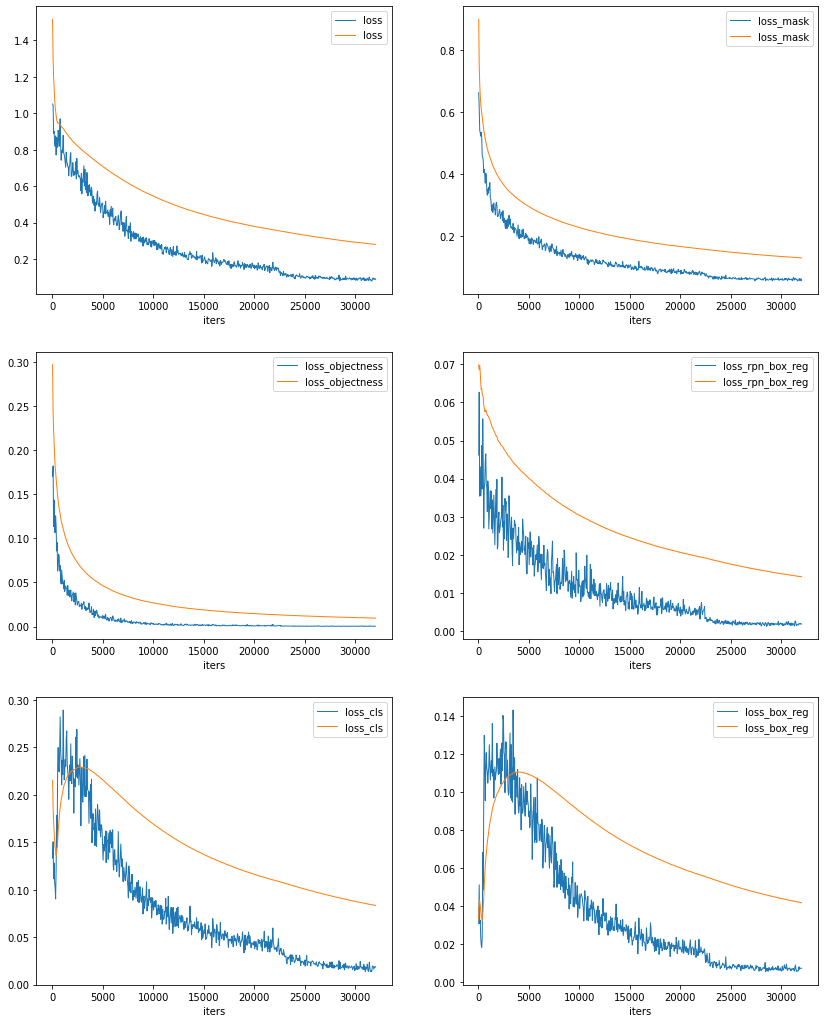

In [7]:
f, ax = plt.subplots(3, 2, figsize=(14, 18))
plot_losses(ax, ite, Y)
# f.savefig(os.path.join(file_dir, "all_losses.png"))

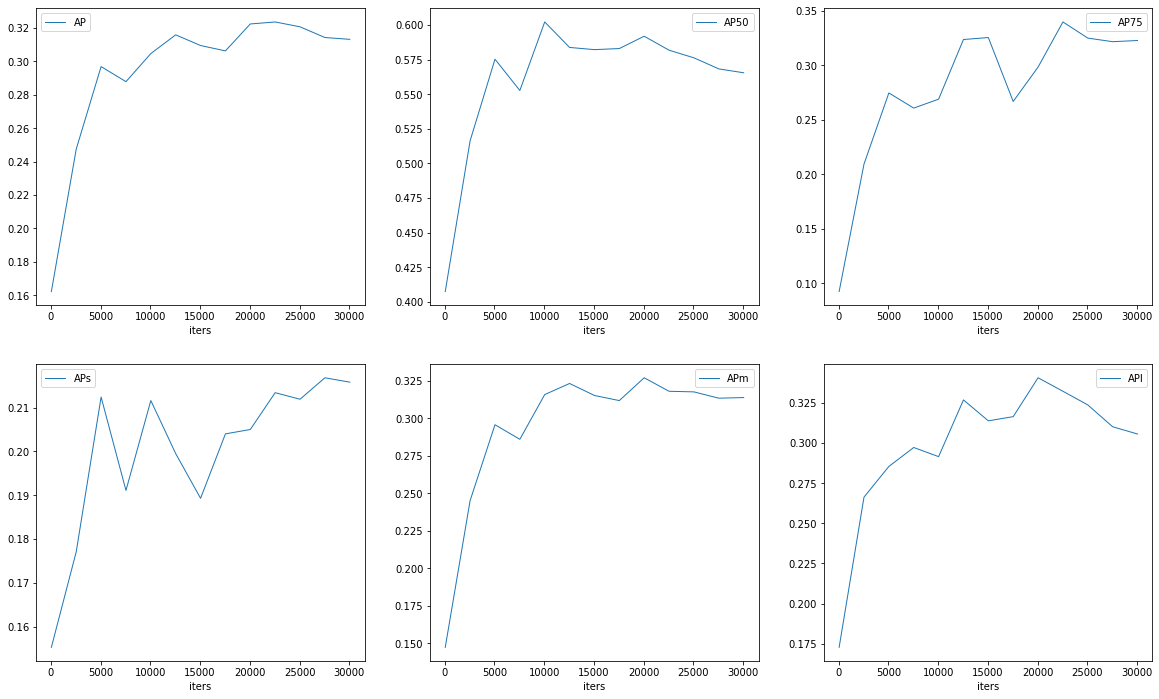

In [8]:
f, ax = plt.subplots(2, 3, figsize=(20, 12))
plot_aps(ax, save_ite, box_aps)
# f.savefig(os.path.join(file_dir, "box_all_aps.png"))

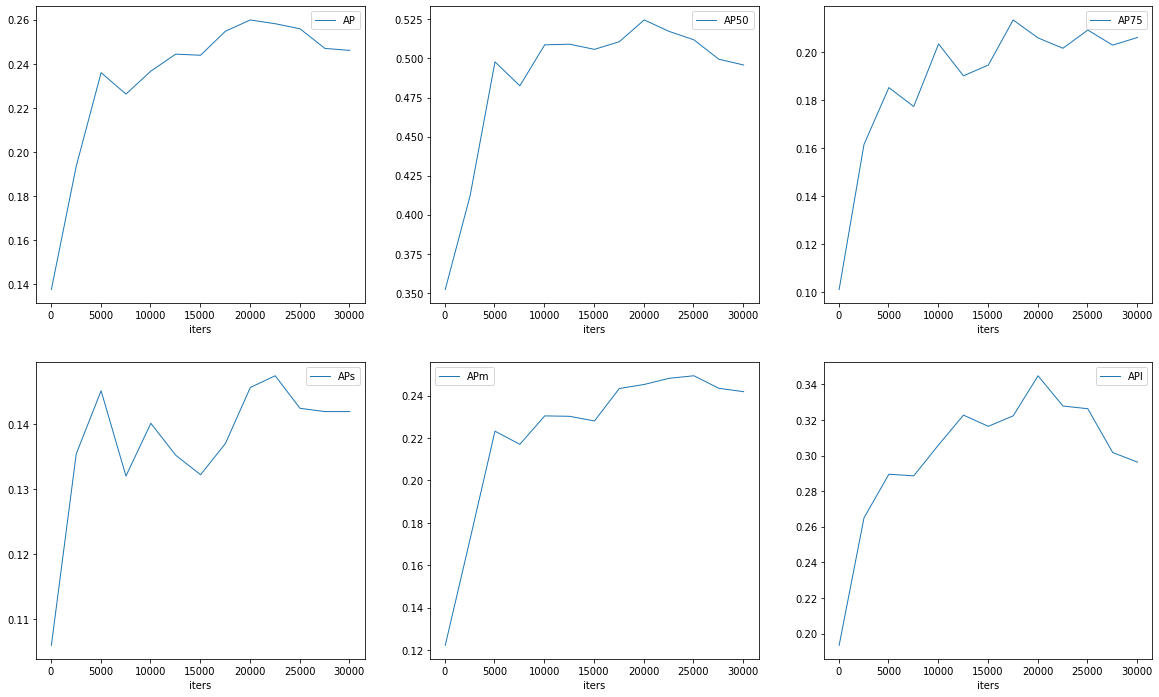

In [9]:
f, ax = plt.subplots(2, 3, figsize=(20, 12))
plot_aps(ax, save_ite, mask_aps)
# f.savefig(os.path.join(file_dir, "mask_all_aps.png"))

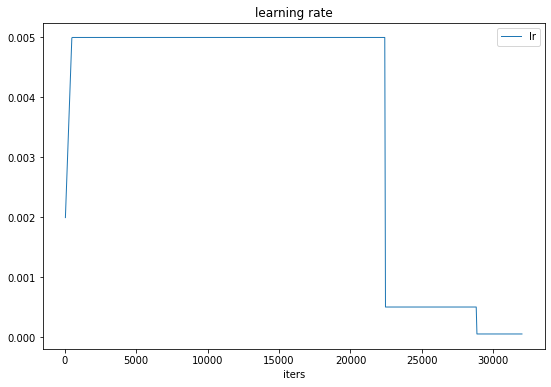

In [10]:
plt.figure(figsize=(9, 6))
plt.plot(ite, lr, linewidth=1.0, linestyle='-', label="lr")
plt.title("learning rate")
plt.xlabel("iters")
plt.legend(loc="best")
# plt.savefig(os.path.join(file_dir, "lr.png"))